# PH 245 Homework 1
Kunal Mishra

### Problem 1

In [31]:
# Loading data
pb1_data = read.table(file='Data-HW1-Cognition.dat', header=FALSE, quote='')
colnames(pb1_data) = c('word-different', 
                       'word-same', 
                       'arabic-different', 
                       'arabic-same'
                      )
head(pb1_data)

word-different,word-same,arabic-different,arabic-same
869,860.5,691.0,601
995,875.0,678.0,659
1056,930.5,833.0,826
1126,954.0,888.0,728
1044,909.0,865.0,839
925,856.5,1059.5,797


In [32]:
# Exploratory Data Analysis
summary(pb1_data)
nrow(pb1_data)

 word-different     word-same      arabic-different  arabic-same   
 Min.   : 656.5   Min.   : 659.5   Min.   : 572.0   Min.   :539.0  
 1st Qu.: 772.2   1st Qu.: 752.0   1st Qu.: 706.0   1st Qu.:624.8  
 Median : 978.8   Median : 873.8   Median : 832.0   Median :693.8  
 Mean   : 967.6   Mean   : 875.6   Mean   : 825.3   Mean   :710.9  
 3rd Qu.:1100.9   3rd Qu.: 930.6   3rd Qu.: 907.1   3rd Qu.:770.6  
 Max.   :1408.5   Max.   :1311.0   Max.   :1081.0   Max.   :986.0  

[1] 32

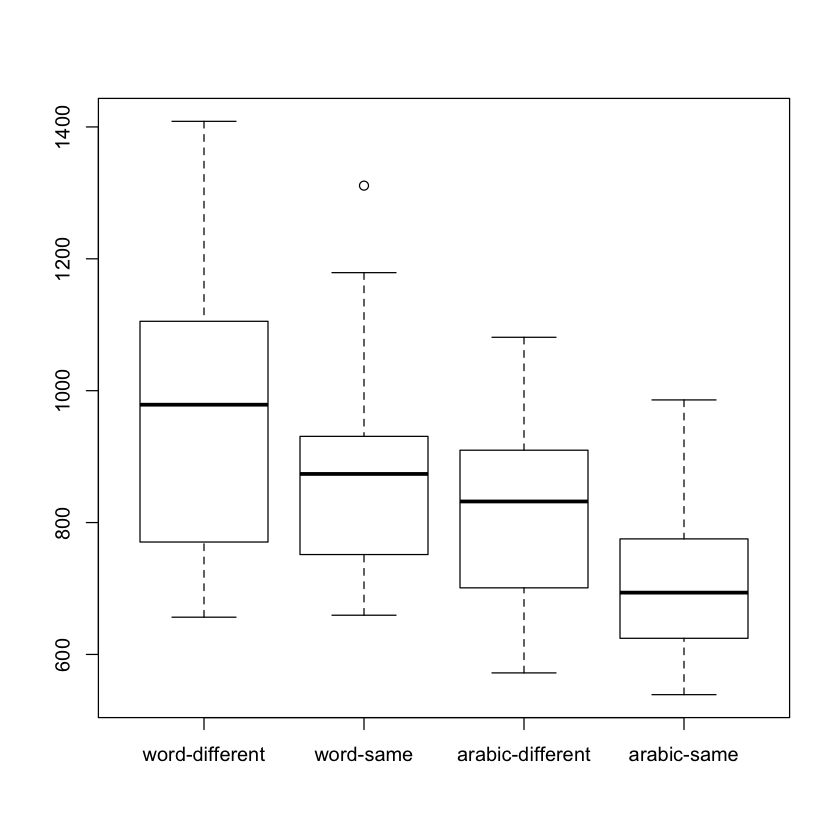

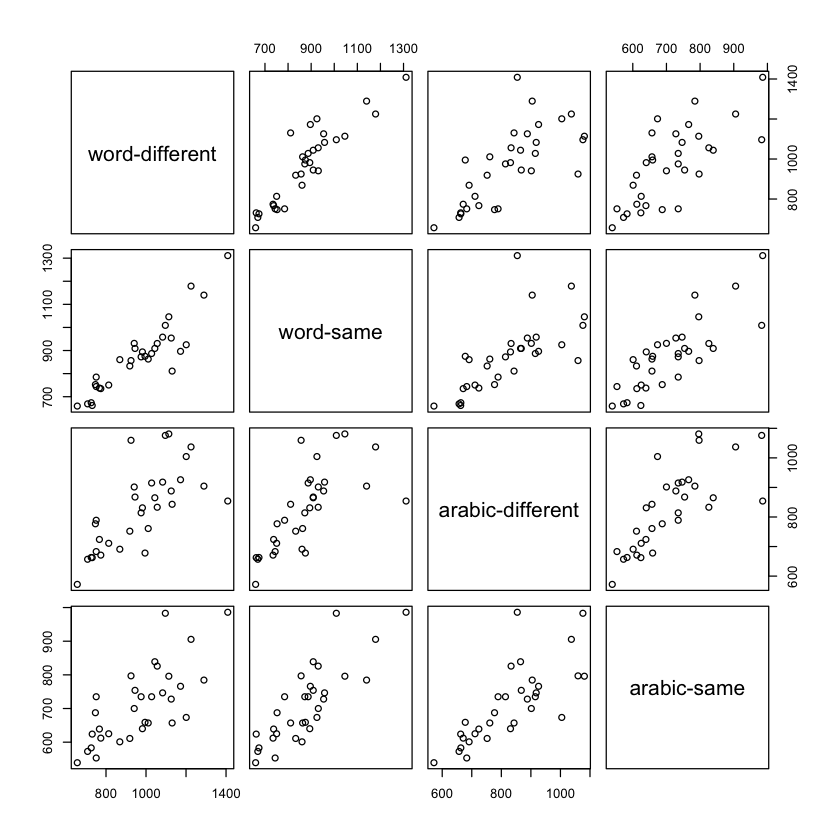

In [78]:
# Exploratory Data Analysis
boxplot(pb1_data); plot(pb1_data)

##### General Comments

1. It seems like every measured variable in the dataset correlates with every other variable
2. *Each* subject was treated with the all 4 treatments, so this study design has me leaning toward an intra-subject repeated measures design. One issue I have with doing this is that I'm treating the 4 measured variables as 4 seperate treatments whereas it is more intuitive to think about it as 2 treatments (word-format and Arabic-digit-format) and comparing parity (same and different) as factors or levels of factors. 
    - Treatment 1: Word-Same
    - Treatment 2: Word-Different
    - Treatment 3: Arabic-digit-Same
    - Treatment 4: Arabic-digit-Different
    - Further resources on factors: http://stattrek.com/statistics/dictionary.aspx?definition=Factor
    - Response variable: Reaction time
3. *Null Hypothesis*: Cu = 0; u1 = u2 = u3 = u4; The congitive processing of numbers **doesn't** depend on the way numbers are presented or their parity. 
4. *Alternative Hypothesis*: Cu != 0; At least one ui != uj for some i, j in set(1, 2, 3, 4); The cognitive processing of numbers **does** depend on the way numbers are presented and their parity
5. Test: Repeated Measures design
6. Test Statistic: T^2 = n(CXbar)Transpose(CSCTranspose)^-1(CXbar)

In [129]:
# Gathering relevant variable data for the test statistic
n = nrow(pb1_data)
xBar = apply(pb1_data, 2, mean)
s = cov(pb1_data)
c = rbind(c(-1, 1, 0, 0), 
          c(0, -1, 1, 0),
          c(0, 0, -1, 1)
         )

tsquaredRepeatedMeasures = function(n, xBar, s, c) {
    return( n *
            t( c %*% xBar ) %*%
            solve( c %*% s %*% t(c) ) %*%
            c %*% xBar
          )
}

In [132]:
# Calculating test statistic and p-value
observedPb1TestStatistic = tsquaredRepeatedMeasures(n, xBar, s, c)
print(observedPb1TestStatistic)

# P-value is tSquared / ( (p)(n-1)/(n-p) ) in the F distribution
# n=nrows, p=degrees of freedom=num variables - 1
observedPValue = 1 - pf(q=observedPb1TestStatistic / (3*31/29), 
                        df1=3, 
                        df2=31
                       )
print(observedPValue)

         [,1]
[1,] 153.7275
             [,1]
[1,] 9.433565e-12


##### Test Statistic Interpretation

With a significance level of .05, our p-value indicates that we can reject the null hypothesis that the cognitive processing of numbers doesn't depend on doesn't depend on the way numbers are presented or their parity. Rather, we have evidence that at least one ui != uj for some i, j in set(1, 2, 3, 4) and that the cognitive processing of numbers does depend on the way numbers are presented and their parity.


In particular, I supsect based on this evidence and our initial EDA with the boxplots, that within our two factors word format < arabic-digit-format and different < same in terms of ease of comprehension.

### Problem 2

In [96]:
# Loading data
pb2_data = read.table(file='Data-HW1-Transportation.dat', header=FALSE, quote='')
colnames(pb2_data) = c('Fuel', 
                       'Repair', 
                       'Capital',
                       'EngineType'
                      ) #All cost of transport per mile
head(pb2_data)

Fuel,Repair,Capital,EngineType
16.44,12.43,11.23,gasoline
7.19,2.70,3.92,gasoline
9.92,1.35,9.75,gasoline
4.24,5.78,7.78,gasoline
11.20,5.05,10.67,gasoline
14.25,5.78,9.88,gasoline


In [117]:
# EDA
summary(pb2_data)
nrow(pb2_data)

      Fuel           Repair          Capital         EngineType
 Min.   : 4.24   Min.   : 1.350   Min.   : 3.28   diesel  :23  
 1st Qu.: 9.12   1st Qu.: 5.145   1st Qu.: 8.15   gasoline:36  
 Median :10.28   Median : 8.890   Median :11.23                
 Mean   :11.39   Mean   : 9.145   Mean   :12.93                
 3rd Qu.:12.70   3rd Qu.:12.575   3rd Qu.:17.00                
 Max.   :29.11   Max.   :21.520   Max.   :35.18                

[1] 59

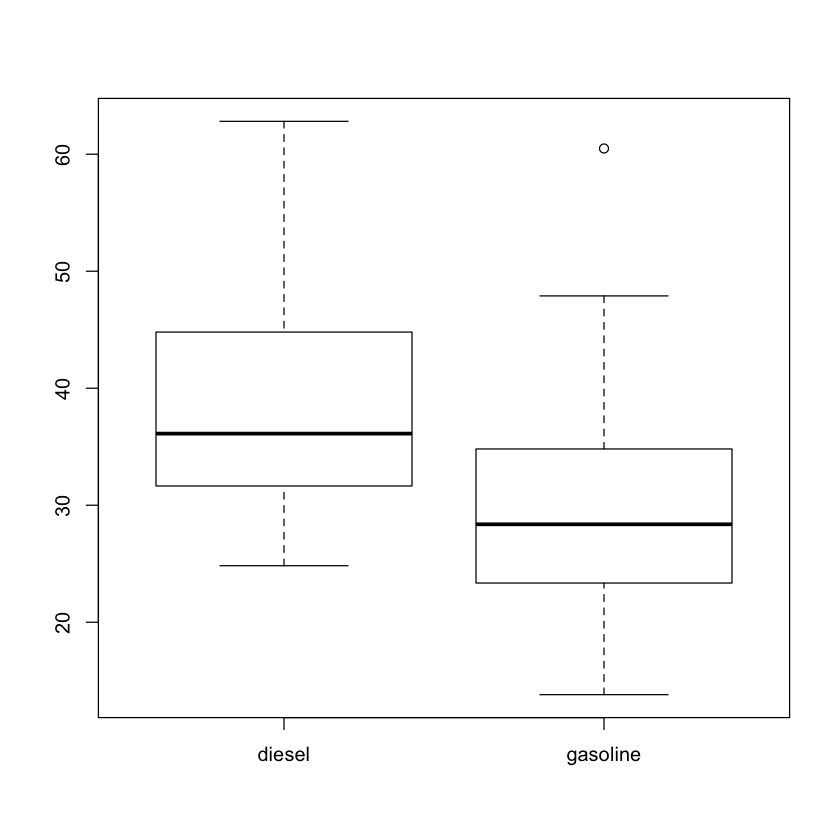

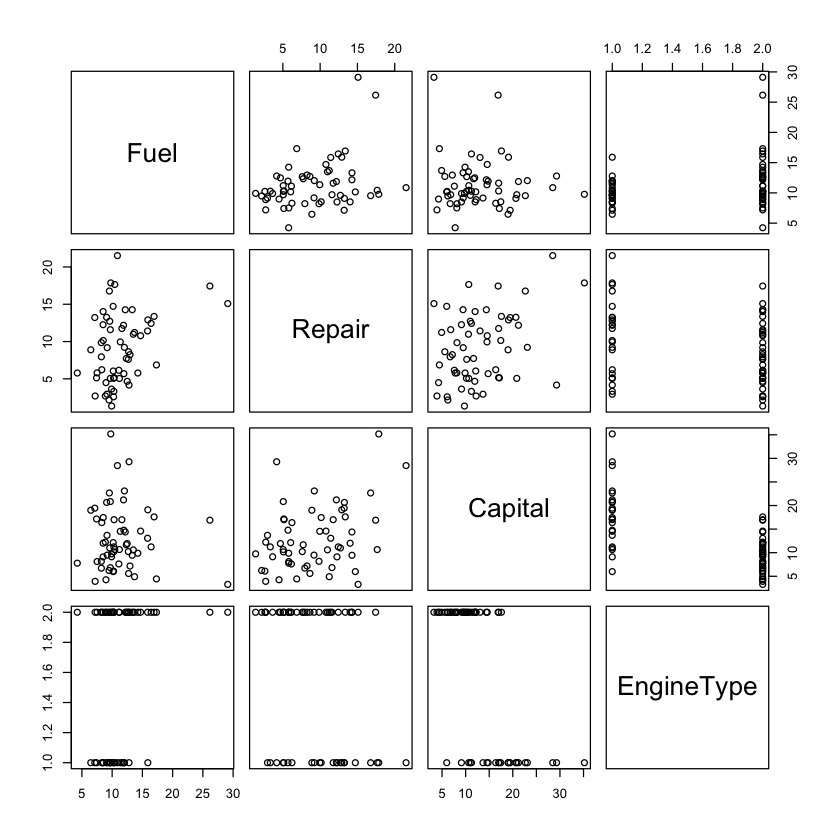

In [119]:
# EDA
boxplot(formula=Fuel+Repair+Capital ~ EngineType, data=pb2_data)
plot(pb2_data)

##### General Comments

1. The question we're examining is if the two types of trucks have statistically significantly different mean costs from each other. Intuitively, we're delving into whether the variance in cost of our observed samples is due to pure chance or whether there is a systematic difference in cost between the two types of trucks.
2. *Null Hypothesis*: u1-u2=0, where u1 is the mean vector of costs of a gasoline truck and u2 is the mean vector of costs of a diesel truck. The two types of trucks (diesel or gasoline) have the same mean costs per mile to operate with respect to the three observed variables.
4. *Alternative Hypothesis*: u1-u2!=0, where u1 is the mean vector of costs of a gasoline truck and u2 is the mean vector of costs of a diesel truck. The two types of trucks (diesel or gasoline) do not have the same mean costs per mile to operate with respect to the three observed variables.
5. Test: Comparing Mean Vectors from Two Populations
6. Test Statistic: (xBar1-xBar2)Transpose \* (S(1/n1 + 1/n2))^-1 * (xBar1-xBar2)

In [128]:
# Filtering dataset
gasoline = pb2_data[pb2_data$EngineType == 'gasoline',]
diesel = pb2_data[pb2_data$EngineType == 'diesel',]

In [136]:
# Gathering relevant variable data for the test statistic

n1 = nrow(gasoline)
n2 = nrow(diesel)

xBar1 = c()
xBar2 = c()

[1] TRUE

### Problem 3

### Problem 4